In [23]:
import pandas as pd
import numpy as np
import pyodbc
from matplotlib import pyplot as plt
from IPython.core.display import display,HTML

display(HTML("<style>.container{width:95% !important;}</style>"))
pd.options.display.max_columns = 999
conn = pyodbc.connect(r'DRIVER={SQL Server Native Client 11.0};'r'SERVER=WIN-5G5AUOCEJPK;'r'DATABASE=Gold585;'r'Trusted_Connection=yes;')

In [225]:
%%time
#Стандартная рассылка
#sql_query ="Select PartnerID, MAX([PurchaseDate]) [PurchaseDate], MAX(LastP) LastP, MAX(QNTVisits) QNTVisits, MIN(Dif) Dif  from ##TempT \
#  Where \
#  LastP = 1 and (Dif between ((365/2)-7) and (365/2)+7 or \
#  Dif between (365/4)-7 and (365/4)+7 or Dif between 365-7 and 365+7) or Dif between (3*365/4)-7 and (3*365/4)+7 \
#  or Dif between 365+(365/4)-7 and 365+(365/4)+7 or Dif between 365+(365/2)-7 and 365+(365/2)+7 or Dif between 365+(3*365/4)-7 and 365+(3*365/4)+7 or Dif between 365+(365)-7 and 365+(365)+7 \
#  Group by PartnerID"

#Отток
#sql_query ="Select PartnerID, MAX([PurchaseDate]) [PurchaseDate], MAX(LastP) LastP, MAX(QNTVisits) QNTVisits, MIN(Dif) Dif  from ##TempT \
#  Where \
#  LastP = 1 \
#  Group by PartnerID \
#  HAVING MAX([PurchaseDate]) > '20170101'"

#Черная пятница
sql_query ="Select  PartnerID, MAX([PurchaseDate]) [PurchaseDate], MAX(LastP) LastP, MAX(QNTVisits) QNTVisits, MIN(Dif) Dif  from ##TempT \
  Where \
  LastP = 1 and  \
  (Dif between ((365/2)-7) and (365/2)+7  or \
  Dif between ((365/4)-7) and (365/4)+7  or \
  Dif between ((3*365/4)-7) and (3*365/4)+7  or \
  Dif between 365-7 and 365+7 or \
  Dif between 2*365-7 and 2*365+7 or \
  Dif between 3*365-7 and 3*365+7 or \
  Dif between 4*365-7 and 4*365+7 or \
  Dif between 5*365-7 and 5*365+7) \
  Group by PartnerID"

df = pd.read_sql(sql_query,conn)
df.head()

Wall time: 2.88 s


In [226]:
df.shape

(439779, 5)

In [8]:
#df.to_csv('NBO-01122018.csv')

In [7]:
#df.drop('Unnamed: 0',axis=1,inplace=True)

In [42]:
#df.shape

(111591, 5)

In [13]:
#df.columns=('PartnerID','Ottok')

In [227]:
df.head()

,PartnerID,PurchaseDate,LastP,QNTVisits,Dif
0,5597643,2017-12-26,1,1,369
1,5606133,2017-12-27,1,1,368
2,5998784,2018-03-30,1,1,275
3,5782692,2018-09-29,1,2,92
4,1840411,2015-12-27,1,3,1099


In [228]:
#df.reset_index(inplace=True)

In [229]:
df[df['PartnerID']==2156652]

,PartnerID,PurchaseDate,LastP,QNTVisits,Dif


In [230]:
#data = pd.read_csv('3 рассылка.csv',engine='python',index_col=0)
data = df

In [78]:
%%time
metal = pd.read_csv('metal_pred.csv',engine='python',index_col=1).drop('Unnamed: 0',axis=1)
wear_type = pd.read_csv('wear_type_pred.csv',engine='python',index_col=1).drop('Unnamed: 0',axis=1)
price_segment = pd.read_csv('PriceSegment.csv',engine='python',index_col=1).drop('Unnamed: 0',axis=1)
ottok = pd.read_csv('ottok.csv',engine='python',index_col=1).drop('Unnamed: 0',axis=1)
ottok.columns = ['Ottok']
insert = pd.read_csv('insert_pred.csv',engine='python',index_col=1).drop('Unnamed: 0',axis=1)
commun = pd.read_csv('Commun_pred.csv' ,engine='python',index_col=1).drop('Unnamed: 0',axis=1)

In [231]:
commun.tail()

,CityID,DvaRavnoOdin,Discount,Points,Sertifikat,SellOut,Shock
PartnerID,,,,,,,
6752962,78,0.00,0.0,0.00,0.0,0.0,0.0
6752967,62,0.01,0.0,0.02,0.0,0.0,0.0
6752969,67,0.02,0.0,0.02,0.0,0.0,0.0
6752971,72,0.00,0.0,0.00,0.0,0.0,0.0
6752980,77,0.00,0.0,0.00,0.0,0.0,0.0


In [232]:
insert.tail()

,Fianit,Diamond,Glass,Topaz,Pearl,Plastik,Granat,Cirkon,Swarovski,Sapfir
PartnerID,,,,,,,,,,
6752962,0.73,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00
6752967,0.02,0.02,0.01,0.00,0.00,0.03,0.0,0.0,0.0,0.00
6752969,0.03,0.05,0.00,0.00,0.01,0.01,0.0,0.0,0.0,0.23
6752971,0.08,0.00,0.00,0.01,0.00,0.00,0.0,0.0,0.0,0.00
6752980,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00


In [233]:
data.set_index('PartnerID',inplace=True,drop=True)

In [234]:
common = data.join([metal,wear_type,price_segment,ottok,insert,commun])

In [235]:
common.head(8)

,PurchaseDate,LastP,QNTVisits,Dif,Zoloto,Colco,Sergi,Podves,Cep,Braslet,Cheap,Expensive,Middle,Ottok,Fianit,Diamond,Glass,Topaz,Pearl,Plastik,Granat,Cirkon,Swarovski,Sapfir,CityID,DvaRavnoOdin,Discount,Points,Sertifikat,SellOut,Shock
PartnerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14,2016-12-24,1,4,736,1.0,0.92,0.07,0.04,0.29,0.02,0.32,0.12,0.95,1.00,0.19,0.89,0.01,0.04,0.03,0.00,0.05,0.02,0.00,0.01,101,0.01,0.00,0.000000,0.00,0.00,0.00000
27,2016-12-29,1,3,731,1.0,0.41,0.74,0.05,0.04,0.00,0.04,0.88,0.60,0.92,0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,92,0.00,0.02,0.010000,0.00,0.00,0.00000
58,2018-09-29,1,6,92,0.0,0.36,0.53,0.78,0.91,0.62,0.39,0.93,0.98,0.02,0.32,0.02,0.72,0.67,0.01,0.05,0.01,0.01,0.67,0.00,49,0.07,0.59,0.080000,0.01,0.00,0.00996
121,2018-03-29,1,6,276,1.0,0.95,0.90,0.36,0.11,0.14,0.84,0.38,0.98,0.02,0.90,0.10,0.01,0.01,0.00,0.00,0.05,0.01,0.00,0.00,92,0.04,0.69,0.149638,0.00,0.01,0.02000
218,2018-07-05,1,9,178,0.0,0.80,0.12,0.84,0.24,0.03,0.49,0.33,0.95,0.93,0.96,0.01,0.05,0.00,0.01,0.01,0.00,0.01,0.00,0.00,121,0.00,0.03,0.020000,0.00,0.00,0.00000
246,2016-12-30,1,3,730,1.0,0.11,0.75,0.04,0.21,0.04,0.44,0.13,0.93,0.91,0.34,0.02,0.01,0.09,0.01,0.00,0.01,0.00,0.00,0.02,14,0.01,0.03,0.010000,0.00,0.00,0.00000
278,2018-01-05,1,3,359,1.0,0.71,0.09,0.15,0.03,0.02,0.44,0.06,0.90,0.05,0.87,0.02,0.00,0.01,0.00,0.02,0.00,0.01,0.00,0.02,22,0.07,0.27,0.140000,0.00,0.00,0.01000
285,2018-06-30,1,3,183,0.0,0.01,0.01,0.00,0.37,0.00,0.04,0.05,0.73,1.00,0.42,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30,0.01,0.06,0.200000,0.00,0.00,0.02000


In [236]:
common['QNTVisits'].quantile(q=0.98)

9.0

In [237]:
common2 = common[common['QNTVisits']<= common['QNTVisits'].quantile(q=0.98)]

In [238]:
common = common2

In [239]:
common2.QNTVisits.value_counts()

1    222100
2     97380
3     48357
4     26242
5     15088
6      9421
7      6037
8      4051
9      2741
Name: QNTVisits, dtype: int64

In [85]:
#metal.reset_index(inplace=True)
#wear_type.reset_index(inplace=True)
#price_segment.reset_index(inplace=True)

In [86]:
#metal[metal['PartnerID']==2297662]

In [87]:
#wear_type[wear_type['PartnerID']==2297662]

In [88]:
#price_segment[price_segment['PartnerID']==2297662]

In [141]:
common.shape

(2264526, 31)

In [240]:
common.reset_index(inplace=True)
common.head()

,PartnerID,PurchaseDate,LastP,QNTVisits,Dif,Zoloto,Colco,Sergi,Podves,Cep,Braslet,Cheap,Expensive,Middle,Ottok,Fianit,Diamond,Glass,Topaz,Pearl,Plastik,Granat,Cirkon,Swarovski,Sapfir,CityID,DvaRavnoOdin,Discount,Points,Sertifikat,SellOut,Shock
0,14,2016-12-24,1,4,736,1.0,0.92,0.07,0.04,0.29,0.02,0.32,0.12,0.95,1.00,0.19,0.89,0.01,0.04,0.03,0.00,0.05,0.02,0.00,0.01,101,0.01,0.00,0.000000,0.00,0.00,0.00000
1,27,2016-12-29,1,3,731,1.0,0.41,0.74,0.05,0.04,0.00,0.04,0.88,0.60,0.92,0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,92,0.00,0.02,0.010000,0.00,0.00,0.00000
2,58,2018-09-29,1,6,92,0.0,0.36,0.53,0.78,0.91,0.62,0.39,0.93,0.98,0.02,0.32,0.02,0.72,0.67,0.01,0.05,0.01,0.01,0.67,0.00,49,0.07,0.59,0.080000,0.01,0.00,0.00996
3,121,2018-03-29,1,6,276,1.0,0.95,0.90,0.36,0.11,0.14,0.84,0.38,0.98,0.02,0.90,0.10,0.01,0.01,0.00,0.00,0.05,0.01,0.00,0.00,92,0.04,0.69,0.149638,0.00,0.01,0.02000
4,218,2018-07-05,1,9,178,0.0,0.80,0.12,0.84,0.24,0.03,0.49,0.33,0.95,0.93,0.96,0.01,0.05,0.00,0.01,0.01,0.00,0.01,0.00,0.00,121,0.00,0.03,0.020000,0.00,0.00,0.00000


In [214]:
#diamond_cl = common[common['Diamond']>0.30].copy() #['PartnerID'].nunique()

In [186]:
#(diamond_cl.fillna(0,inplace=True))

In [183]:
#diamond_cl.Zoloto.value_counts()

1.0    50328
0.0     1056
Name: Zoloto, dtype: int64

In [187]:
def for_client_wear(string):
    
    if string.Colco >= string.Sergi and string.Colco >= string.Podves and string.Colco >= string.Cep and string.Colco >= string.Braslet:
        return 'Кольцо'
    elif string.Sergi >= string.Colco and string.Sergi >= string.Podves and string.Sergi >= string.Cep and string.Sergi >= string.Braslet:
        return 'Серьги'
    elif string.Podves >= string.Colco and string.Podves >= string.Sergi and string.Podves >= string.Cep and string.Podves >= string.Braslet:
        return 'Подвес'
    elif string.Cep >= string.Colco and string.Cep >= string.Podves and string.Cep >= string.Sergi and string.Cep >= string.Braslet:
        return 'Цепь'
    elif string.Braslet >=string.Colco and string.Braslet >= string.Podves and string.Braslet >= string.Cep and string.Braslet >= string.Sergi:
        return 'Браслет'
    else:
        return 'Кольцо'
    
def for_client_price(string):
    if string.Cheap >= string.Expensive and string.Cheap >= string.Middle:
        return 'Дешевый'
    elif string.Expensive >= string.Cheap and string.Expensive >= string.Middle:
        return 'Дорогой'
    else:
        return 'Средний'
    
def for_client_insert(string):
    if string.Fianit >= string.Diamond and string.Fianit >= string.Glass  and string.Fianit >= string.Topaz  and string.Fianit >= string.Pearl \
        and string.Fianit >= string.Plastik and string.Fianit >= string.Granat and string.Fianit >= string.Cirkon and string.Fianit >= string.Swarovski \
        and string.Fianit >= string.Sapfir:
        return 'ФИАНИТ'
    elif string.Diamond >= string.Fianit and string.Diamond >= string.Glass  and string.Diamond >= string.Topaz  and string.Diamond >= string.Pearl \
        and string.Diamond >= string.Plastik and string.Diamond >= string.Granat and string.Diamond >= string.Cirkon and string.Diamond >= string.Swarovski \
        and string.Diamond >= string.Sapfir:
        return 'БРИЛЛИАНТ'
#    elif string.Glass >= string.Fianit and string.Glass >= string.Diamond and string.Glass >= string.Topaz  and string.Glass >= string.Pearl \
#        and string.Glass >= string.Plastik and string.Glass >= string.Granat and string.Glass >= string.Cirkon and string.Glass >= string.Swarovski \
#        and string.Glass >= string.Sapfir:
#        return 'СТЕКЛО'
    elif string.Topaz >= string.Fianit and string.Topaz >= string.Diamond and string.Topaz >= string.Glass  and string.Topaz >= string.Pearl \
        and string.Topaz >= string.Plastik and string.Topaz >= string.Granat and string.Topaz >= string.Cirkon and string.Topaz >= string.Swarovski \
        and string.Topaz >= string.Sapfir:
        return 'ТОПАЗ'
    elif string.Pearl >= string.Fianit and string.Pearl >= string.Diamond and string.Pearl >= string.Glass  and string.Pearl >= string.Topaz \
        and string.Pearl >= string.Plastik and string.Pearl >= string.Granat and string.Pearl >= string.Cirkon and string.Pearl >= string.Swarovski \
        and string.Pearl >= string.Sapfir:
        return 'ЖЕМЧУГ'
#    elif string.Plastik >= string.Fianit and string.Plastik >= string.Diamond and string.Plastik >= string.Glass  and string.Plastik >= string.Topaz \
#        and string.Plastik >= string.Pearl and string.Plastik >= string.Granat and string.Plastik >= string.Cirkon and string.Plastik >= string.Swarovski \
#        and string.Plastik >= string.Sapfir:
#        return 'ПЛАСТИК'
    elif string.Granat >= string.Fianit and string.Granat >= string.Diamond and string.Granat >= string.Glass  and string.Granat >= string.Topaz \
        and string.Granat >= string.Pearl and string.Granat >= string.Plastik and string.Granat >= string.Cirkon and string.Granat >= string.Swarovski \
        and string.Granat >= string.Sapfir:
        return 'ГРАНАТ'
    elif string.Cirkon >= string.Fianit and string.Cirkon >= string.Diamond and string.Cirkon >= string.Glass  and string.Cirkon >= string.Topaz \
        and string.Cirkon >= string.Pearl and string.Cirkon >= string.Plastik and string.Cirkon >= string.Granat and string.Cirkon >= string.Swarovski \
        and string.Cirkon >= string.Sapfir:
        return 'ЦИРКОН'
    elif string.Swarovski >= string.Fianit and string.Swarovski >= string.Diamond and string.Swarovski >= string.Glass  and string.Swarovski >= string.Topaz \
        and string.Swarovski >= string.Pearl and string.Swarovski >= string.Plastik and string.Swarovski >= string.Granat and string.Swarovski >= string.Cirkon \
        and string.Swarovski >= string.Sapfir:
        return 'СВАРОВСКИ'
    elif string.Sapfir >= string.Fianit and string.Sapfir >= string.Diamond and string.Sapfir >= string.Glass  and string.Sapfir >= string.Topaz \
        and string.Sapfir >= string.Pearl and string.Sapfir >= string.Plastik and string.Sapfir >= string.Granat and string.Sapfir >= string.Cirkon \
        and string.Sapfir >= string.Swarovski:
        return 'САПФИР'
    else:
        return 'ФИАНИТ'

def for_client_commun(string):
    if string.Discount >= string.DvaRavnoOdin and string.Discount >= string.Points and string.Discount >= string.Sertifikat \
        and string.Discount >= string.SellOut and string.Discount >= string.Shock:
        return 'Скидка'
    elif string.DvaRavnoOdin >= string.Discount and string.DvaRavnoOdin >= string.Points and string.DvaRavnoOdin >= string.Sertifikat \
        and string.DvaRavnoOdin >= string.SellOut and string.DvaRavnoOdin >= string.Shock:
        return '2=1'
    elif string.Points >= string.Discount and string.Points >= string.DvaRavnoOdin and string.Points >= string.Sertifikat \
        and string.Points >= string.SellOut and string.Points >= string.Shock:
        return 'Баллы'
#    elif string.Sertifikat >= string.Discount and string.Sertifikat >= string.DvaRavnoOdin and string.Sertifikat >= string.Points \
#        and string.Sertifikat >= string.SellOut and string.Sertifikat >= string.Shock:
#        return 'Подарочный сертификат'
#    elif string.SellOut >= string.Discount and string.SellOut >= string.DvaRavnoOdin and string.SellOut >= string.Points \
#        and string.SellOut >= string.Sertifikat and string.SellOut >= string.Shock:
#        return 'Распродажа'
#    elif string.Shock >= string.Discount and string.Shock >= string.Shock and string.Shock >= string.Points \
#        and string.Shock >= string.Sertifikat and string.Shock >= string.SellOut:
#        return 'Шок'
    else:
        return 'Скидка'

In [241]:
common['Zoloto'] = common['Zoloto'].map({1:'Золото',0:'Серебро'})

In [243]:
common.shape

(431417, 32)

In [194]:
diamond_cl.head()

,PartnerID,PurchaseDate,LastP,QNTVisits,Dif,Zoloto,Colco,Sergi,Podves,Cep,Braslet,Cheap,Expensive,Middle,Ottok,Fianit,Diamond,Glass,Topaz,Pearl,Plastik,Granat,Cirkon,Swarovski,Sapfir,CityID,DvaRavnoOdin,Discount,Points,Sertifikat,SellOut,Shock,Тип ношения,Цена,Вставка,Коммуникация
6,14.0,2016-12-24,1.0,4.0,707.0,Золото,0.92,0.07,0.04,0.29,0.02,0.32,0.12,0.95,1.00,0.190000,0.89,0.01,0.04,0.03,0.0,0.05,0.02,0.00,0.01,101.0,0.01,0.00,0.00,0.0,0.00,0.00,Кольцо,Дешевый,БРИЛЛИАНТ,2=1
26,54.0,2016-01-24,1.0,1.0,1042.0,Золото,0.97,0.03,0.00,0.00,0.04,0.04,0.11,0.92,1.00,0.100000,0.80,0.00,0.02,0.00,0.0,0.02,0.00,0.01,0.00,104.0,0.00,0.00,0.00,0.0,0.00,0.00,Кольцо,Дешевый,БРИЛЛИАНТ,Скидка
38,75.0,2018-07-11,1.0,3.0,143.0,Золото,0.39,0.31,0.01,0.00,0.00,0.01,0.60,0.41,0.00,0.040000,0.79,0.01,0.03,0.00,0.0,0.00,0.00,0.00,0.01,92.0,0.00,0.02,0.04,0.0,0.01,0.00,Кольцо,Дорогой,БРИЛЛИАНТ,Баллы
40,79.0,2017-01-21,1.0,3.0,679.0,Золото,0.16,0.91,0.10,0.05,0.01,0.06,0.57,0.86,0.91,0.186105,0.77,0.00,0.03,0.01,0.0,0.01,0.00,0.00,0.13,61.0,0.00,0.03,0.01,0.0,0.00,0.00,Серьги,Дешевый,БРИЛЛИАНТ,Скидка
50,100.0,2016-01-24,1.0,1.0,1042.0,Золото,0.72,0.01,0.00,0.00,0.00,0.00,0.72,0.01,1.00,0.040000,0.45,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,36.0,0.00,0.00,0.01,0.0,0.00,0.01,Кольцо,Дорогой,БРИЛЛИАНТ,Баллы


In [248]:
%%time

common['Тип ношения'] = common[['Colco','Sergi','Podves','Cep','Braslet']].idxmax(axis=1)
common['Цена']        = common[['Cheap','Expensive','Middle']].idxmax(axis=1)
common['Вставка']     = common[['Fianit','Diamond','Topaz','Pearl','Granat','Cirkon','Swarovski','Sapfir']].idxmax(axis=1)
common['Коммуникация']        = common[['Discount','Points','DvaRavnoOdin']].idxmax(axis=1)

#for index, row in common.iterrows():
#    diamond_cl.set_value(index, 'Тип ношения', for_client_wear(row)) 
#    diamond_cl.set_value(index, 'Цена', for_client_price(row)) 
#    diamond_cl.set_value(index, 'Вставка', for_client_insert(row)) 
#    diamond_cl.set_value(index, 'Коммуникация', for_client_commun(row)) 
    #break

Wall time: 2.18 s


In [250]:
common[['PartnerID','CityID', 'Zoloto', 'Тип ношения', 'Цена', 'Вставка', 'Коммуникация']].to_csv('Выборка 11 Декабрь 4-2.csv', encoding='windows-1251')

In [246]:
common.to_csv('Diamond.csv', encoding='windows-1251')

KeyboardInterrupt: 

In [172]:
common.head()

,PartnerID,PurchaseDate,LastP,QNTVisits,Dif,Zoloto,Colco,Sergi,Podves,Cep,Braslet,Cheap,Expensive,Middle,Ottok,Fianit,Diamond,Glass,Topaz,Pearl,Plastik,Granat,Cirkon,Swarovski,Sapfir,CityID,DvaRavnoOdin,Discount,Points,Sertifikat,SellOut,Shock,Тип ношения,Цена,Вставка,Коммуникация
6,14.0,2016-12-24,1.0,4.0,707.0,Золото,0.92,0.07,0.04,0.29,0.02,0.32,0.12,0.95,1.00,0.190000,0.89,0.01,0.04,0.03,0.00,0.05,0.02,0.00,0.01,101.0,0.01,0.00,0.00,0.0,0.00,0.00,Кольцо,Дешевый,БРИЛЛИАНТ,2=1
18,44.0,2018-05-08,1.0,5.0,207.0,Золото,0.92,0.23,0.27,0.06,0.19,0.81,0.86,0.47,0.02,0.206105,0.17,0.00,0.11,0.03,0.00,0.06,0.00,0.01,0.03,79.0,0.04,0.02,0.02,0.0,0.01,0.00,Кольцо,Дорогой,ФИАНИТ,2=1
26,54.0,2016-01-24,1.0,1.0,1042.0,Золото,0.97,0.03,0.00,0.00,0.04,0.04,0.11,0.92,1.00,0.100000,0.80,0.00,0.02,0.00,0.00,0.02,0.00,0.01,0.00,104.0,0.00,0.00,0.00,0.0,0.00,0.00,Кольцо,Дешевый,БРИЛЛИАНТ,Скидка
35,72.0,2018-03-02,1.0,7.0,274.0,Золото,0.30,0.97,0.11,0.04,0.05,0.68,0.26,0.99,0.01,0.910000,0.16,0.08,0.02,0.02,0.03,0.02,0.00,0.00,0.00,128.0,0.06,0.13,0.75,0.0,0.05,0.01,Серьги,Дешевый,ФИАНИТ,Баллы
38,75.0,2018-07-11,1.0,3.0,143.0,Золото,0.39,0.31,0.01,0.00,0.00,0.01,0.60,0.41,0.00,0.040000,0.79,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.01,92.0,0.00,0.02,0.04,0.0,0.01,0.00,Кольцо,Дорогой,БРИЛЛИАНТ,Баллы


In [128]:
common['Тип ношения'].value_counts()

Кольцо     226588
Серьги      89432
Цепь        43928
Подвес      36016
Браслет     18897
Name: Тип ношения, dtype: int64

In [129]:
common.QNTVisits.value_counts()

1    212563
2     93742
3     46751
4     25405
5     14681
6      9194
7      5902
8      3945
9      2678
Name: QNTVisits, dtype: int64

In [166]:
common.to_csv('Бриллиант Декабрь 4.csv', encoding='windows-1251') #2018/11/09

In [55]:
minottok = (common[(common['Ottok']>=0)&(common['Ottok']<0.3)]).sample(50000)
(common[(common['Ottok']>0)&(common['Ottok']<0.3)]).head()

,PartnerID,Ottok,Zoloto,Colco,Sergi,Podves,Cep,Braslet,Cheap,Expensive,Middle,Акция,Цена
28,44,0.02,1.0,0.92,0.23,0.27,0.06,0.19,0.81,0.86,0.47,Кольцо,Expensive
33,49,0.01,1.0,0.28,0.06,0.04,0.18,0.01,0.08,0.29,0.43,Кольцо,Middle
41,58,0.02,0.0,0.36,0.53,0.78,0.91,0.62,0.39,0.93,0.98,Цепь,Middle
46,68,0.01,1.0,0.92,0.81,0.33,0.29,0.09,0.88,0.93,0.73,2=1 Кольцо и серьги,Expensive
48,72,0.01,1.0,0.30,0.97,0.11,0.04,0.05,0.68,0.26,0.99,Серьги,Middle


In [56]:
maxottok = (common[(common['Ottok']>0.7)&(common['Ottok']<=1)]).sample(50000)
(common[(common['Ottok']>0.7)&(common['Ottok']<1)]).head()

,PartnerID,Ottok,Zoloto,Colco,Sergi,Podves,Cep,Braslet,Cheap,Expensive,Middle,Акция,Цена
16,27,0.92,1.0,0.41,0.74,0.05,0.04,0.00,0.04,0.88,0.60,Серьги,Expensive
17,28,0.99,1.0,0.48,0.43,0.27,0.72,0.02,0.09,0.50,0.96,Цепь,Middle
19,34,0.89,1.0,0.89,0.13,0.23,0.19,0.00,0.33,0.46,0.98,Кольцо,Middle
42,60,0.85,1.0,0.32,0.09,0.22,0.01,0.01,0.35,0.43,0.59,Кольцо,Middle
53,79,0.91,1.0,0.16,0.91,0.10,0.05,0.01,0.06,0.57,0.86,Серьги,Middle


In [57]:
minottok.to_csv('Отток min.csv',encoding='windows-1251')
maxottok.to_csv('Отток max.csv',encoding='windows-1251')

In [129]:
common[common['Акция']=='2=1 Кольцо и серьги'].to_csv('Выборка 5.csv',encoding='windows-1251')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002D9ACC3CF8>]],
      dtype=object)

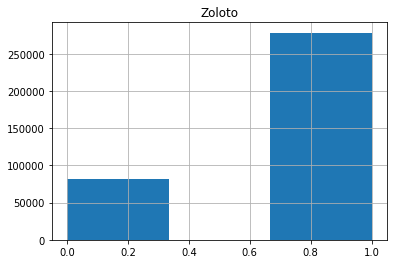

In [54]:
common.hist(column='Zoloto',bins=3)

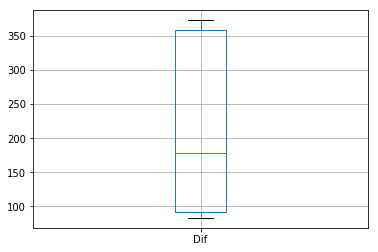

In [165]:
common.boxplot(column='Dif')
#common.boxplot(column='Sergi')Colco
#common.boxplot(column='Colco')

In [ ]:
common.hist(column='Sergi',bins=10)